# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#setting temperature to celsius
units = "metric"
#putting together url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karasu
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | bouna
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | happy valley-goose bay
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | kwolla
Processing Record 10 of Set 1 | palau
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | arkhangel'sk
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | college
Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,karasu,41.0710,30.7854,14.93,60,5,2.35,TR,1715141237
1,sitka,57.0531,-135.3300,7.94,71,100,9.26,US,1715141053
2,bouna,9.2667,-3.0000,24.73,83,100,1.62,CI,1715141237
3,georgetown,5.4112,100.3354,32.96,66,20,3.09,MY,1715140971
4,okhotsk,59.3833,143.3000,1.66,76,99,4.78,RU,1715141237


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,karasu,41.0710,30.7854,14.93,60,5,2.35,TR,1715141237
1,sitka,57.0531,-135.3300,7.94,71,100,9.26,US,1715141053
2,bouna,9.2667,-3.0000,24.73,83,100,1.62,CI,1715141237
3,georgetown,5.4112,100.3354,32.96,66,20,3.09,MY,1715140971
4,okhotsk,59.3833,143.3000,1.66,76,99,4.78,RU,1715141237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

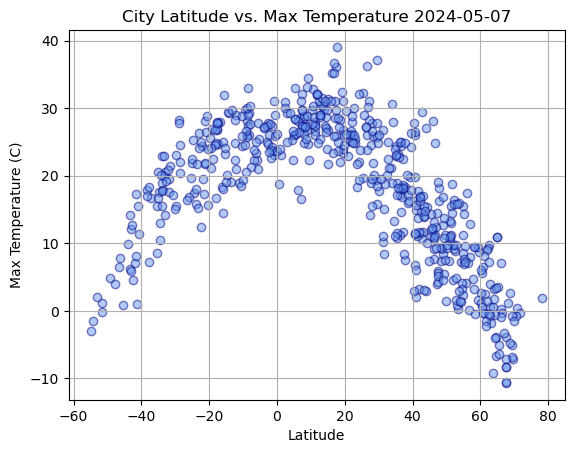

In [53]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat_plot = city_data_df['Lat'].tolist()
temp_plot = city_data_df['Max Temp'].tolist()
plt.scatter(lat_plot, temp_plot, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha = 0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature 2024-05-07')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

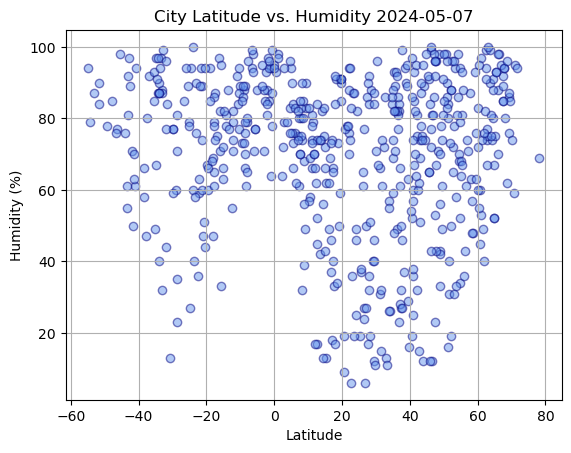

In [54]:
# Build the scatter plots for latitude vs. humidity
lat_plot = city_data_df['Lat'].tolist()
humid_plot = city_data_df['Humidity'].tolist()
plt.scatter(lat_plot, humid_plot, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha = 0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity 2024-05-07')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

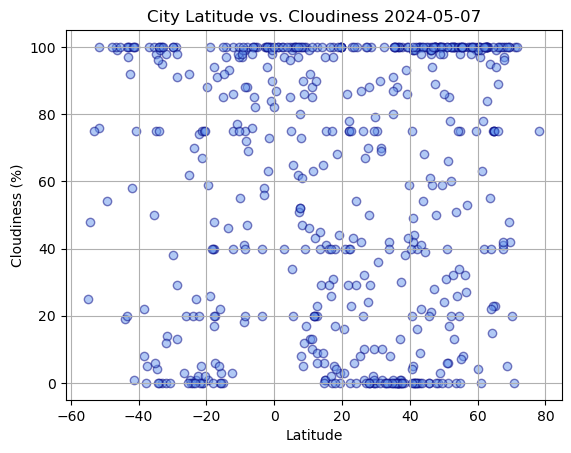

In [55]:
# Build the scatter plots for latitude vs. cloudiness
lat_plot = city_data_df['Lat'].tolist()
cloud_plot = city_data_df['Cloudiness'].tolist()
plt.scatter(lat_plot, cloud_plot, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha = 0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness 2024-05-07')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

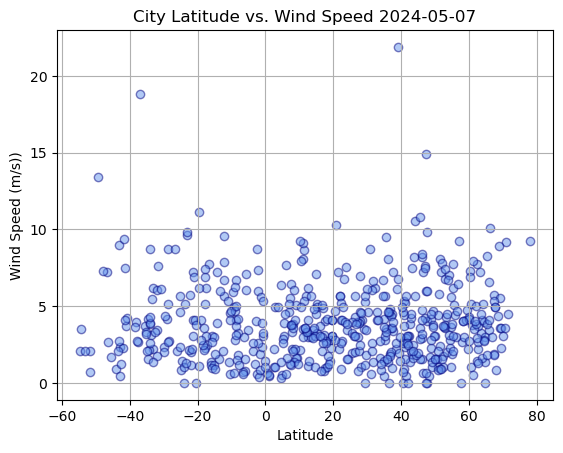

In [56]:
# Build the scatter plots for latitude vs. wind speed
lat_plot = city_data_df['Lat'].tolist()
windspd_plot = city_data_df['Wind Speed'].tolist()
plt.scatter(lat_plot, windspd_plot, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha = 0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed 2024-05-07')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s))')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def lin_regress_def(x, y, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y) 
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y, marker="o", color= 'cornflowerblue', edgecolor='navy', alpha=0.5)
    plt.plot(x, regress_values, "r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, (min(x), min(y)), fontsize =15, color ='red')
    
    plt.tight_layout
    
    print(f"the r value is: {rvalue}")

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,karasu,41.0710,30.7854,14.93,60,5,2.35,TR,1715141237
1,sitka,57.0531,-135.3300,7.94,71,100,9.26,US,1715141053
2,bouna,9.2667,-3.0000,24.73,83,100,1.62,CI,1715141237
3,georgetown,5.4112,100.3354,32.96,66,20,3.09,MY,1715140971
4,okhotsk,59.3833,143.3000,1.66,76,99,4.78,RU,1715141237


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,touros,-5.1989,-35.4608,25.46,88,100,3.43,BR,1715141238
7,kununurra,-15.7667,128.7333,31.99,33,3,3.09,AU,1715141238
10,east london,-33.0153,27.9116,20.52,88,100,6.17,ZA,1715141238
11,ushuaia,-54.8000,-68.3000,-2.95,94,25,2.10,AR,1715141239
12,grytviken,-54.2811,-36.5092,-1.55,79,48,3.54,GS,1715141239


###  Temperature vs. Latitude Linear Regression Plot

the r value is: -0.8669776240404163


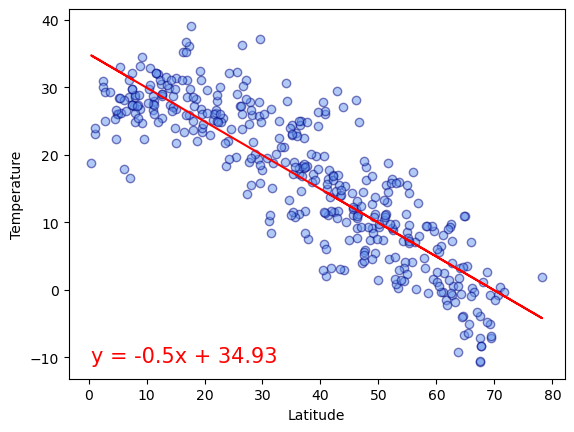

In [45]:
# Linear regression on Northern Hemisphere
lin_regress_def(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature')


the r value is: 0.7954884667825752


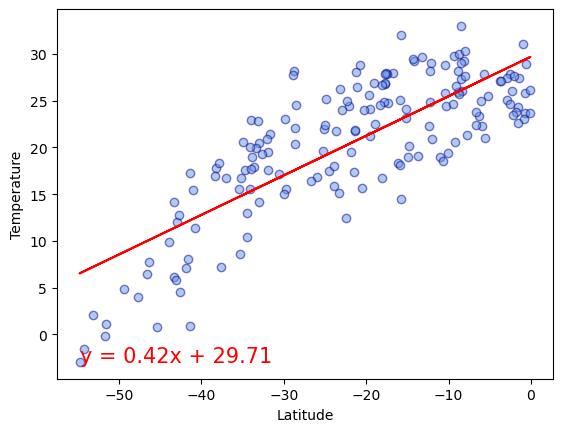

In [46]:
# Linear regression on Southern Hemisphere
lin_regress_def(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature')

**Discussion about the linear relationship:** This linear regression is modeling cities' max temperature based on the cities' latitude. There is a negative relationship shown for the northern hemisphere and a positive relationship shown for the southern hemisphere. The results of the linear regression relationship shows that the closer a city is to the latitude of "0" (the equator), the higher the city's max temperature. Meanwhile, the further away a city is (more positive or more negative), the lower the city's max temperature. There also seems to be more data points (cities) around areas of warmer temperature- this is more evident within the southern hemisphere and indicates that with warmer weather comes the ability to establish more cities. There seem to be more cities clustered around about 25 degrees celsius and that may indicate a preferred temperature for establishing cities. 

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.1395496440500002


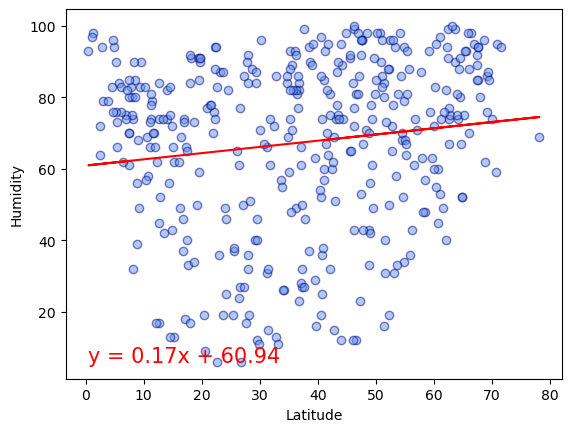

In [47]:
# Northern Hemisphere
lin_regress_def(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

the r value is: 0.14359983553726258


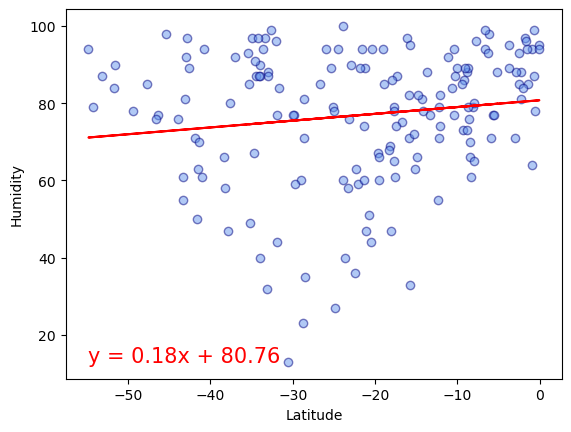

In [48]:
# Southern Hemisphere
lin_regress_def(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** This linear regression is modeling cities' humidity based on the cities' latitude. There is a positive relationship shown for both the northern hemisphere and the southern hemisphere. The results of the linear regression relationship between humidity and temperature show that the closer a city is to the latitude of "0" (the equator), the higher the city's humidity. The southern hemisphere also displays cities with a higher base humidity in comparison to the northern hemisphere. There appears to be a greater cluster of data points around above 60% humidity- this indicates that either cities prefer locations of this humidity and build around it, or possibly the cities may have affected the areas humidity to increase. There seems to be more established cities around -20 and 20 latitude regardless of humidity- I believe this may be due to an abundance of land and relatively warmer temperatures, though this should still be further researched. This relationship also has similar findings to that of the previous discussion between latitude and temperature. I believe warmer temperature, higher humidity, and more land help decide the areas in which a city may be developed. I believe there should be further research into other city locations rather than just southern/northern hemispheres and latitude. For example, it may be worthwhile looking into the distance between cities and larger bodies of water such as oceans to determine humidity and their relationship. I suggest this due to the likeliness of water particles increasing the humidity of an area. This relationship makes sense to me in that higher humidity, temperature, and land give rise to more bountiful vegetation which is important for a populations' development. 

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.14069399788468379


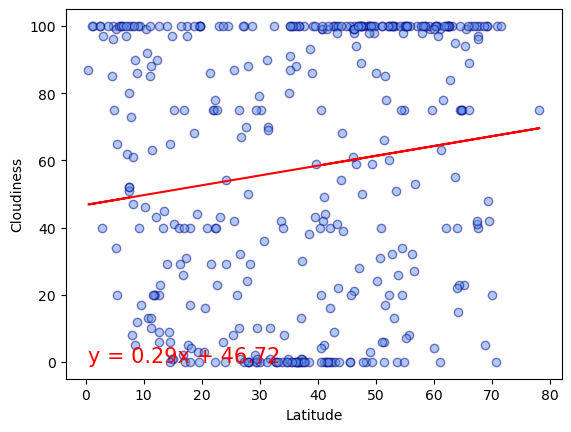

In [49]:
# Northern Hemisphere
lin_regress_def(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

the r value is: 0.12649675343210443


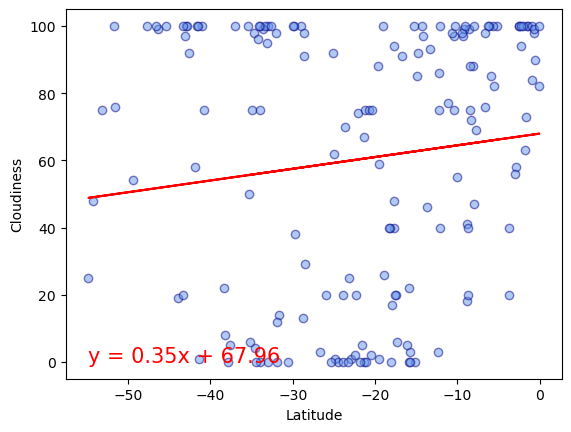

In [50]:
# Southern Hemisphere
lin_regress_def(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** This linear regression models the relationship between latitude and cloudiness of particular cities. There is a positive relationship shown for both the northern hemisphere and the southern hemisphere. Overall, there seems to be clusters of less cloudiness around -20 to -30 latitude and 20 to 30 latitude, with increasingly more cloudiness at other latitudes. The clusters of less cloudiness have similar data points to that of the latitude and humidity relationship in which latitudes of around -20 and 20 have less humidity. There may be a positive relationship between less cloudiness and less humidity. This makes sense as water sources may contribute to both humidity and cloudiness- so a lack of water sources may contribute to less cloudiness and humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.09486089782349387


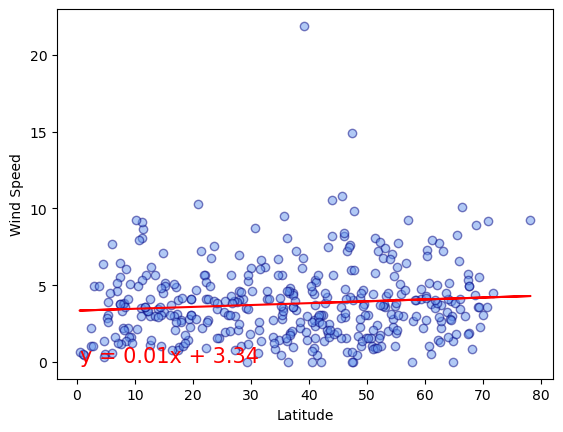

In [51]:
# Northern Hemisphere
lin_regress_def(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

the r value is: -0.09518577958081526


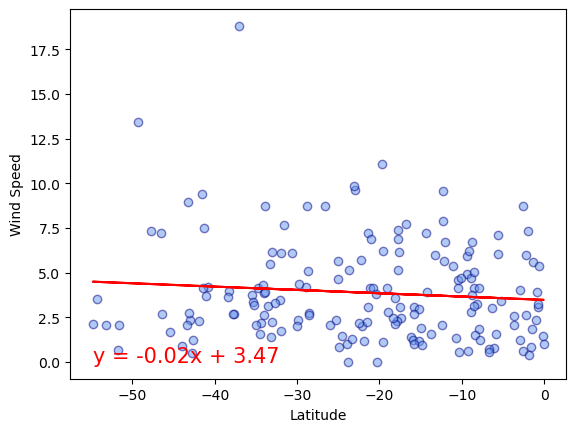

In [52]:
# Southern Hemisphere
lin_regress_def(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** This linear regression models the relationship betwen wind speed and latitude. There is a slight negative relationship shown for both the northern hemisphere and the southern hemisphere. Both hemispheres have a regression line displaying the same base wind speed from around 2-4 m/s. however, most cities are centered around a wind speed of 4 m/s or less and it is likely that the fewer cities that have higher wind speeds are bringing the overall wind speed of the regression line higher. 